Método de componentes principales

El método de componentes principales consiste en identificar caules son las variables que aportan mayor información para poder reducir dimensiones, extrayendo caracteristicas, o incluso creando nuevas variaibles que son combinaciones lineales de otras, consolidando la información sin eliminar por completo las variables.

¿Qué es Principal Component Analysis?

Es una técnica de Extracción de Características, 
donde combinamos las entradas de una manera específica 
y podemos eliminar algunas de las variables 
“menos importantes” manteniendo la parte más 
importante todas las variables. Como valor añadido, 
luego de aplicar PCA conseguiremos que todas las 
nuevas variables sean independientes una de otra.

¿Como funciona el Analisis de Componentes Principales?


En resumen lo que hace el algoritmo es:

*Estandarizar los datos de entrada (ó Normalización de las Variables)

*Obtener los autovectores y autovalores de la matriz de covarianza

*Ordenar los autovalores de mayor a menor y elegir los “k” autovectores que se correspondan con los autovectores “k” más grandes (donde “k” es el número de dimensiones del nuevo subespacio de características).

*Construir la matriz de proyección W con los “k” autovectores seleccionados.
    
*Transformamos el dataset original “X estandarizado” vía W para obtener las nuevas características k-dimensionales.


In [1]:
#Ejercicio extraido del siguiente blog:
#http://www.aprendemachinelearning.com/comprende-principal-component-analysis/


In [3]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
#Dataframe para trabajar
dataframe=pd.read_csv(r"comprar_alquilar.csv")
dataframe.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [7]:
#Normalizando los datos
scaler = StandardScaler()
#Eliminamos la variable de respuesta
df = dataframe.drop(['comprar'],axis=1)
#Calculamos la media para la transformación
scaler.fit(df)
#Escalamos y normalizamos datos
xscaled = scaler.transform(df)


In [9]:
#Instanciamos objeto PCA y aplicamos

pca=PCA(n_components = 9)
#Nota: También se puede instanciar pca sólo 
#con el mínimo explicado que requerimos 
#Ej.: pca=PCA(.85

#Obtenemos los componentes principales
pca.fit(xscaled)
#Convertimos los datos con las nuevas dimensiones
x_pca = pca.transform(xscaled)

In [13]:
print("Aspecto de  X PCA: ",x_pca.shape)
#Tenemos que x_pca contiene 202 registros y 9 columnas

expl = pca.explained_variance_ratio_

print(expl)
print("suma de variación explicada: ", sum(expl[0:5]))
#Podemos ver que con 5 componentes podemos
#explicar poco más del 85% de la variación

Aspecto de  X PCA:  (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma de variación explicada:  0.8524062117714312


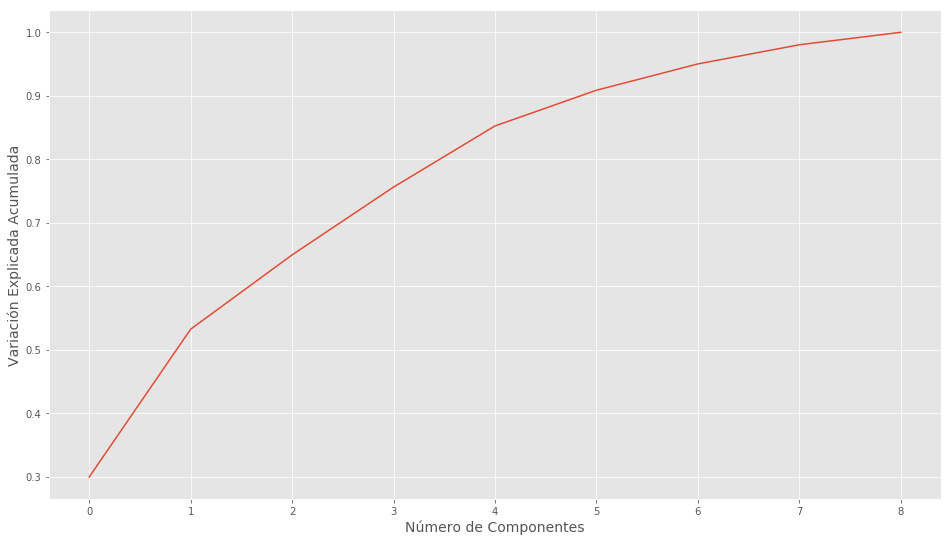

In [19]:
#Grafiquemos la variación acumulada en 
#las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de Componentes",fontsize=14)
plt.ylabel("Variación Explicada Acumulada",fontsize=14)
plt.show()

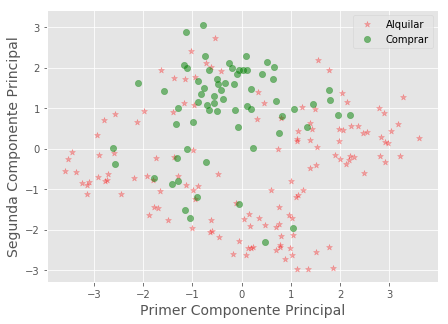

In [18]:
#Graficamos en 2 dimensiones los 2 primeros 
#Componentes Principales
Xax = x_pca[:,0]
Yax = x_pca[:,1]
#Valores a graficar
labels = dataframe["comprar"].values
#Color para los puntos
cdict = {0:"red",1:"green"}
#Descriptivo de los puntos graficados
labl = {0:"Alquilar",1:"Comprar"}
#Tipo de punto a graficar
marker = {0:"*",1:"o"}
alpha = {0:.3, 1:.5}
fig,ax = plt.subplots(figsize = (7,5))
fig.patch.set_facecolor("white")
for l in np.unique(labels):
    ix = np.where(labels == l)
    ax.scatter(Xax[ix],Yax[ix], c = cdict[l],label = labl[l],s=40,marker = marker[l],alpha=alpha[l])

plt.xlabel("Primer Componente Principal",fontsize=14)
plt.ylabel("Segunda Componente Principal",fontsize=14)
plt.legend()
plt.show()